In [1]:
using Revise
#addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = Walk1D()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b; n_iterations=1200)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

Walk1DMDP.Walk1DState(0, 1.0)

In [4]:
hr = HistoryRecorder(; rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

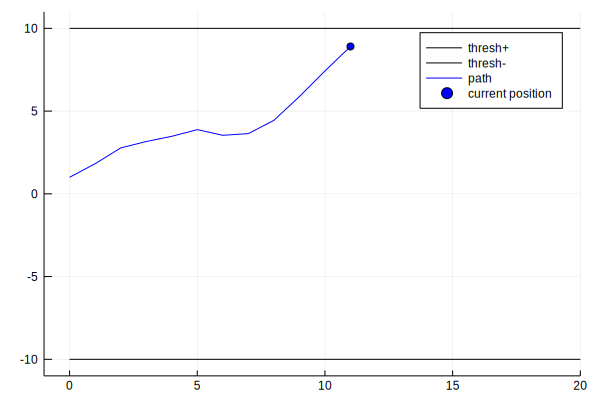

In [5]:
plot(mdp, h)

In [6]:
sum(h.reward_hist)

-16.336679890117992

## Observer

In [7]:
mdp = Walk1D()
observer = AQObserver(1)
b = DPWBandit(mdp; exploration_constant=20.0, k_action=0.5, alpha_action=0.5, observer=observer)
solver = ModularSolver(mdp, b; n_iterations=1200)
policy = solve(solver, mdp);

In [8]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
a, info = action_info(policy, s0)

(0.6161015080848357, Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 1200),Pair{Symbol,Any}(:search_time_us, 0x0000000000031664),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(6, 3.28272)], Any[0.000225132], -0.918939, Any[], Any[], 0.0, 1.0, 1.0))))

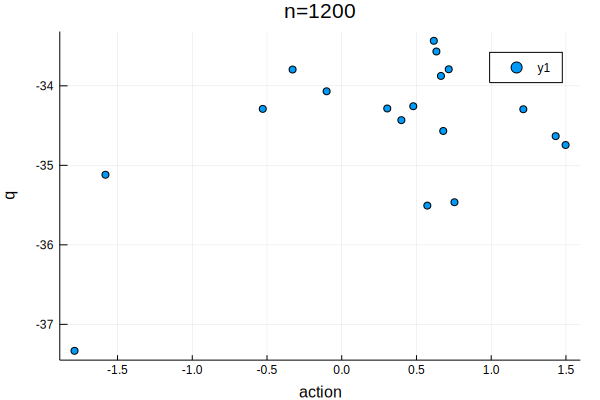

In [9]:
plot(observer, 1200)

In [10]:
animate(observer; fps=4, ylim=(-45.0,-12.0))

INFO: Saved animation to /Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif


Plots.AnimatedGif("/Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif")

In [11]:
observer.Xs[10]

2-element Array{Float64,1}:
  0.679107
 -0.528431

In [17]:
observer.ys[502]

12-element Array{Float64,1}:
 -34.2955
 -34.4473
 -35.8976
 -35.2352
 -33.7895
 -34.6586
 -33.4538
 -33.775 
 -33.823 
 -34.079 
 -35.654 
 -34.5128

In [16]:
observer.ys[501]

12-element Array{Float64,1}:
 -34.2955
 -34.4473
 -35.8976
 -35.2352
 -33.7895
 -34.6586
 -33.4538
 -33.775 
 -33.823 
 -34.079 
 -35.654 
 -34.3516

In [15]:
observer.ns[502]

12-element Array{Int64,1}:
 45
 43
 31
 36
 51
 40
 57
 51
 50
 47
 33
 18